In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_profiling
%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/aashgohil/Customer_churn/main/Telco-Customer-Churn.csv' , na_values=['', ' '])

In [60]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df.shape

(7043, 21)

In [62]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [63]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [64]:
# Since there are 11 entries with no data we could drop these rows.

df = df.dropna(subset=['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [65]:
# Converting Senior Citizen to Yes/No

df.SeniorCitizen = df.SeniorCitizen.replace({0:'No',1:'Yes'})

df.SeniorCitizen.value_counts()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

# EDA


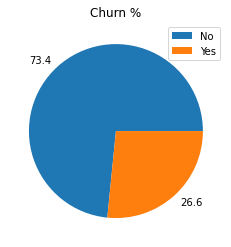

In [66]:
# Ploting Total Customer Churn

churn_labels = df.Churn.value_counts().keys().tolist()

plt.pie(df.Churn.value_counts()/len(df), labels=(round(df.Churn.value_counts()/len(df)*100,1)))
plt.legend(churn_labels)
plt.title('Churn %')
plt.show()

In [67]:
# Replace the Churn variable from Yes/No to 1/0
df.loc[df.Churn=='No','Churn'] = 0
df.loc[df.Churn=='Yes','Churn'] = 1

df['Churn'] = df.Churn.astype(int)

In [68]:
df.groupby('gender').Churn.mean()


gender
Female    0.269595
Male      0.262046
Name: Churn, dtype: float64

In [69]:
# This function creates the necessary subplots for the categorical barplots...
def categorical_barplots(feature_list, row_num, col_num, fig_dim):

    # Creating the matplotlib figure with 4 subplots and setting its dimensions
    f, axs = plt.subplots(nrows=row_num, ncols=col_num, figsize=fig_dim)

    # 'Unravelling' the axs object from a 2d array to a 1d array
    axs = axs.ravel()

    # Each iteration of this loop plots one subplot along with proper formatting and labels
    for feature in feature_list:
        groupby_func = df.groupby(feature).Churn.mean().sort_values(ascending=False)
        
        sb.barplot(x=groupby_func.index, y=groupby_func, ax=axs[feature_list.index(feature)], order=list(groupby_func.index))
        axs[feature_list.index(feature)].set_ylabel('Churn %', fontsize=12)
        axs[feature_list.index(feature)].set_title(f'{feature.capitalize()} vs. Churn Likelihood')
        axs[feature_list.index(feature)].set_xlabel('')

In [70]:
# Writing a function to create neccessary subplots

def barplotsa1(feature_list,row_num, col_num, fig_dim):

    # Creating matplotlib figure with subplots.
    f, axs = plt.subplots(nrows=row_num, ncols=col_num, figsize=fig_dim)
    axs = axs.ravel()

    # Each iteration of loop plots one subplot along with formatting and labels
    for feature in feature_list:
        groupby_func = df.groupby(feature).Churn.mean().sort_values(ascending=False)
        
        sb.barplot(x=groupby_func.index, y=groupby_func, ax=axs[feature_list.index(feature)], order=list(groupby_func.index))
        axs[feature_list.index(feature)].set_ylabel('Churn %', fontsize=12)
        axs[feature_list.index(feature)].set_title(f'{feature.capitalize()} vs. Churn Likelihood')
        axs[feature_list.index(feature)].set_xlabel('')


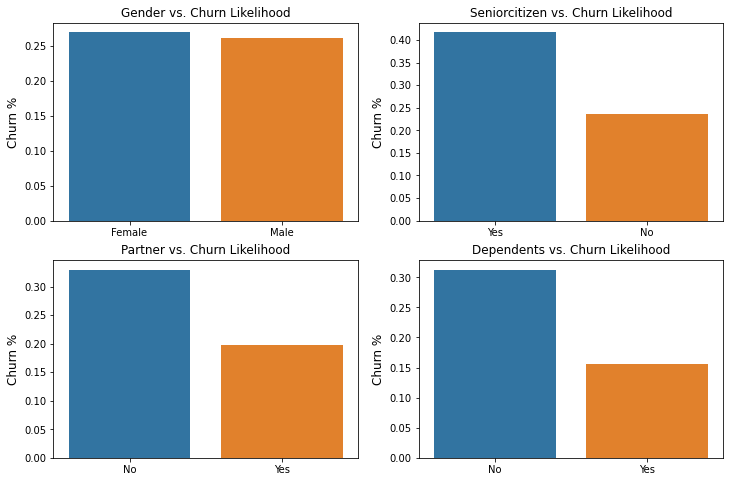

In [71]:
barplotsa1(['gender', 'SeniorCitizen', 'Partner', 'Dependents'],2,2,(12,8))


Gender doesn't seem to have much effect on whether customers are likely to churn or not.

Senior Citizens are significantly more likely to Churn (41% vs. 24%), as well as customers without partners (36% vs. 19%) nor dependents (32% vs. 15%), these might be important features for our Churn model.


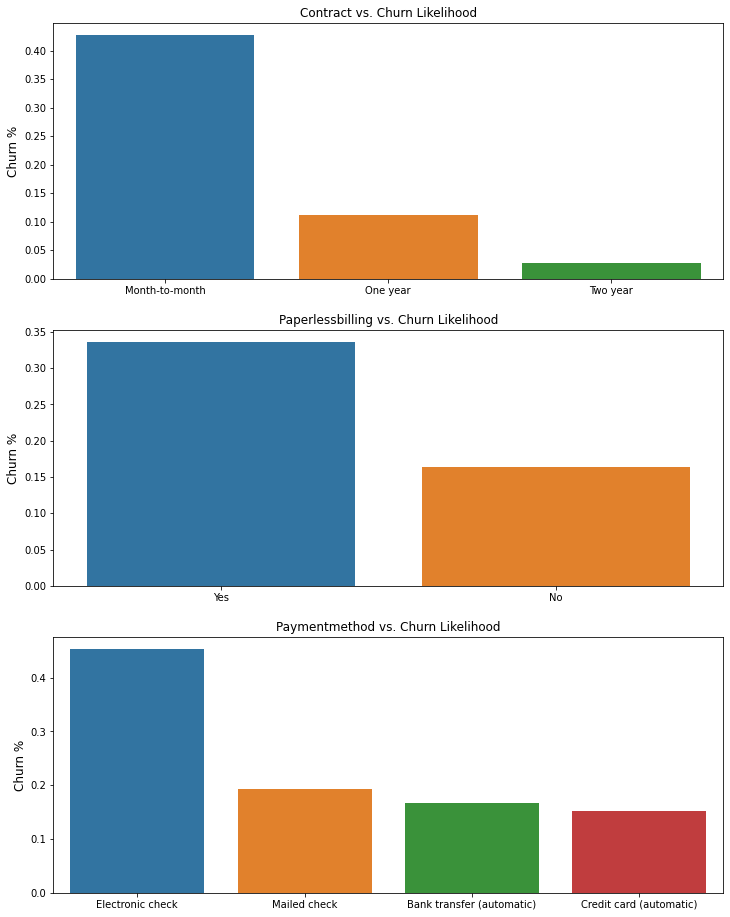

In [72]:
account_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

barplotsa1(account_features,3,1,(12,16))


Customers that pay through electronic check churn the most, automatic methods of payment have lower churn rate.

Short-term contracts have high churn rates - Two-year contracts have very low churn rates.

Paperless billing has a higher churn rate.

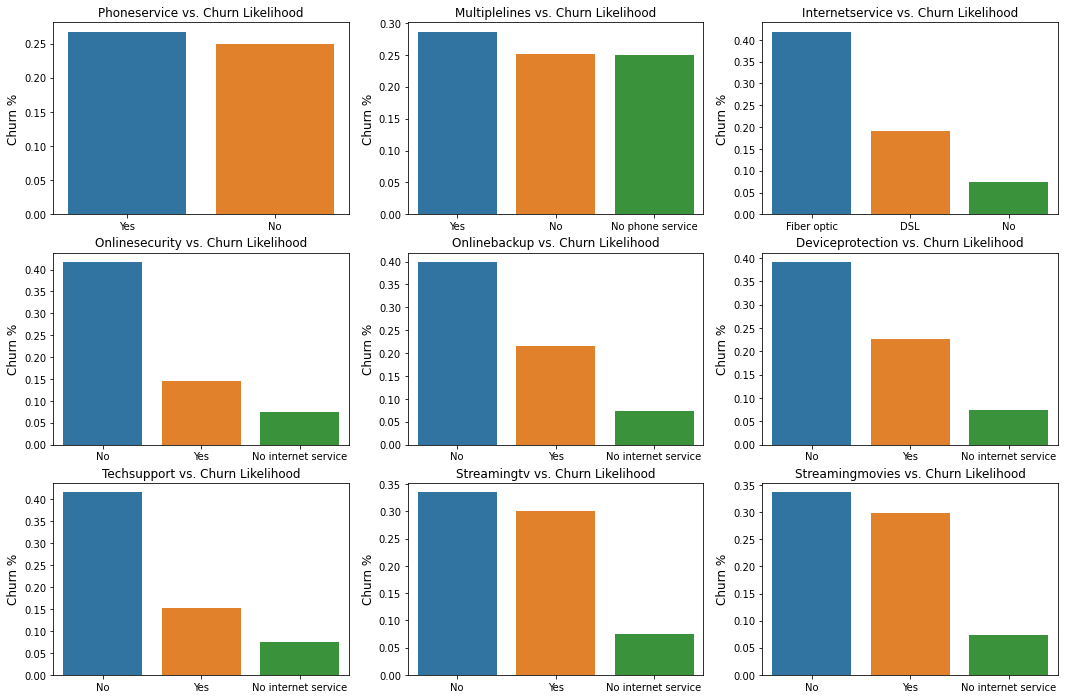

In [73]:
services_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
barplotsa1(services_features, 3, 3, (18,12))


Phone and Multiple Lines feature don't seem to have much effect on Churn rate

In general, customers without additional services seem to have a higher likelihood of churning

Customers with no internet service have the lowest probability of churning.

# Feature Engineering


In [74]:
#Perform One Hot Encoding using get_dummies method

df_churn = pd.get_dummies(df, columns = ['Contract','Dependents','DeviceProtection','gender',
                                                        'InternetService','MultipleLines','OnlineBackup',
                                                        'OnlineSecurity','PaperlessBilling','Partner',
                                                        'PaymentMethod','PhoneService','SeniorCitizen',
                                                        'StreamingMovies','StreamingTV','TechSupport'],drop_first=True
                               )

df_churn.head()


,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0


In [75]:
#Perform Feature Scaling
from sklearn.preprocessing import StandardScaler

#Perform Feature Scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' to scal
standardScaler = StandardScaler()
columns_for_ft_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Apply the feature scaling operation on dataset using fit_transform() method
df_churn[columns_for_ft_scaling] = standardScaler.fit_transform(df_churn[columns_for_ft_scaling])


df_churn.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0
3,7795-CFOCW,0.512486,-0.747850,-0.195248,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,-1.239504,0.196178,-0.940457,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0


In [76]:
#Create target variable y and feature variable X
y = df_churn['Churn']
X = df_churn.drop(['Churn','customerID'], axis = 1)

In [77]:
#Split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

In [78]:
# Machine Learning classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [79]:
#Fiting the logistic Regression Model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)

# Find Accuracy using accuracy_score method
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

print(logmodel_accuracy)

81.14


In [80]:
#Generate confusion matrix for logistics regression model
from sklearn.metrics import confusion_matrix
conf_mat_logmodel = confusion_matrix(y_test,pred)
conf_mat_logmodel

array([[1396,  165],
       [ 233,  316]])

In [81]:
 #Predicting the probability of Churn of each customer
df_churn['Probability_of_Churn'] = logmodel.predict_proba(df_churn[X_test.columns])[:,1]
df_churn[['customerID','Probability_of_Churn']].head()

,customerID,Probability_of_Churn
0,7590-VHVEG,0.649601
1,5575-GNVDE,0.043494
2,3668-QPYBK,0.343624
3,7795-CFOCW,0.025990
4,9237-HQITU,0.693996
